1. 데이터 전처리 및 데이터 결합

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 폴더 경로 지정하기
stats_data_path='./stats_data/'

salary_data_path='./salary_data/'

# 해당 폴더 안에 있는 파일 리스트 불러오기
stats_files = os.listdir(stats_data_path)

salary_files = os.listdir(salary_data_path)

# 오름 차순으로 파일 명 정렬
stats_files = sorted(stats_files, reverse=False)
salary_files = sorted(salary_files, reverse=False)

# 인플레이션 비율 정의
inflation_rates = {
    2017: 245.120, 2018: 251.107, 2019: 255.657, 
    2020: 258.811, 2021: 270.970, 2022: 292.655,
    2023: 304.702, 2024: 315.664
}
base_inflation = inflation_rates[2024]  # 기준 연도: 2024
sc = {
    2017: 99093000, 2018: 101869000, 2019: 109140000, 
    2020: 109140000, 2021: 112414000, 2022: 123655000,
    2023: 134000000, 2024: 143000000
}

all_data = [] # 데이터 병합을 위한 리스트
salary_year = int(salary_files[0][11:15]) # 연봉 데이터 년도

# 파일들을 시즌별로 처리
for i, (stats_file, salary_file) in enumerate(zip(stats_files, salary_files)):
    try:
        stats_file = stats_files[i]

        # 데이터 로드
        stats_data = pd.read_csv(stats_data_path + stats_file)
        salary_data = pd.read_csv(salary_data_path + salary_file)

        # 연봉 데이터의 이름에서 포지션 제거
        salary_data['NAME'] = salary_data['NAME'].str.split(',').str[0].str.strip()
        
        # 연봉 데이터의 컬럼명 변경
        salary_data.rename(columns={'NAME':'Player'}, inplace=True)
        
        # 연봉 데이터에서 $ 제거 및 숫자형으로 변환
        salary_data['SALARY'] = salary_data['SALARY'].replace('[\$,]', '', regex=True).astype(int)
        
        # 인플레이션 조정 (소수점 제거)
        current_inflation = inflation_rates.get(salary_year, base_inflation)
        salary_data['SALARY_ADJUSTED'] = (salary_data['SALARY'] * (base_inflation / current_inflation))
        
        # 이름을 기준으로 병합
        merged_data = pd.merge(
            stats_data, salary_data,
            how='inner',
            left_on=['Player'],
            right_on=['Player']
        )
        
        # 시즌 정보 추가
        merged_data['SEASON'] = f'{salary_year}-{salary_year+1}'
        
        # 병합된 데이터 추가
        all_data.append(merged_data)

        salary_year += 1 
    except Exception as e:
        print(f"에러 발생 개인 지표 파일 {stats_file}")
        print(f"에러 발생 개인 연봉 파일 {salary_file}")
        print(f"에러 : {e}")

# 모든 시즌 데이터를 하나의 데이터프레임으로 결합
final_data = pd.concat(all_data, ignore_index=True)

      RK          Player                   TEAM    SALARY        sc  \
0      1   Stephen Curry  Golden State Warriors  37457154  0.378000   
1      2   Blake Griffin        Detroit Pistons  32088932  0.323826   
2      3    Paul Millsap         Denver Nuggets  31269231  0.315554   
3      4      Kyle Lowry        Toronto Raptors  31200000  0.314856   
4      5  Gordon Hayward         Boston Celtics  29727900  0.300000   
..   ...             ...                    ...       ...       ...   
460  461     Tyler Smith        Milwaukee Bucks   1157153  0.008092   
461  462    Bronny James     Los Angeles Lakers   1157153  0.008092   
462  463    Cam Christie            LA Clippers   1157153  0.008092   
463  464  Antonio Reeves   New Orleans Pelicans   1157153  0.008092   
464  465   Pelle Larsson             Miami Heat   1157143  0.008092   

     SALARY_ADJUSTED  
0           0.486786  
1           0.417022  
2           0.406369  
3           0.405469  
4           0.386338  
..       

SEASON
2017-2018    0.000323
2018-2019    0.000168
2019-2020    0.001678
2020-2021    0.000109
2021-2022    0.000171
2022-2023    0.000069
2023-2024    0.002599
2024-2025    0.013230
Name: sc, dtype: float64
SEASON
2017-2018    0.378000
2018-2019    0.367699
2019-2020    0.368625
2020-2021    0.394048
2021-2022    0.407253
2022-2023    0.388743
2023-2024    0.387430
2024-2025    0.389939
Name: sc, dtype: float64
SEASON
2017-2018    0.078607
2018-2019    0.075865
2019-2020    0.077170
2020-2021    0.072851
2021-2022    0.075293
2022-2023    0.068131
2023-2024    0.079012
2024-2025    0.084091
Name: sc, dtype: float64


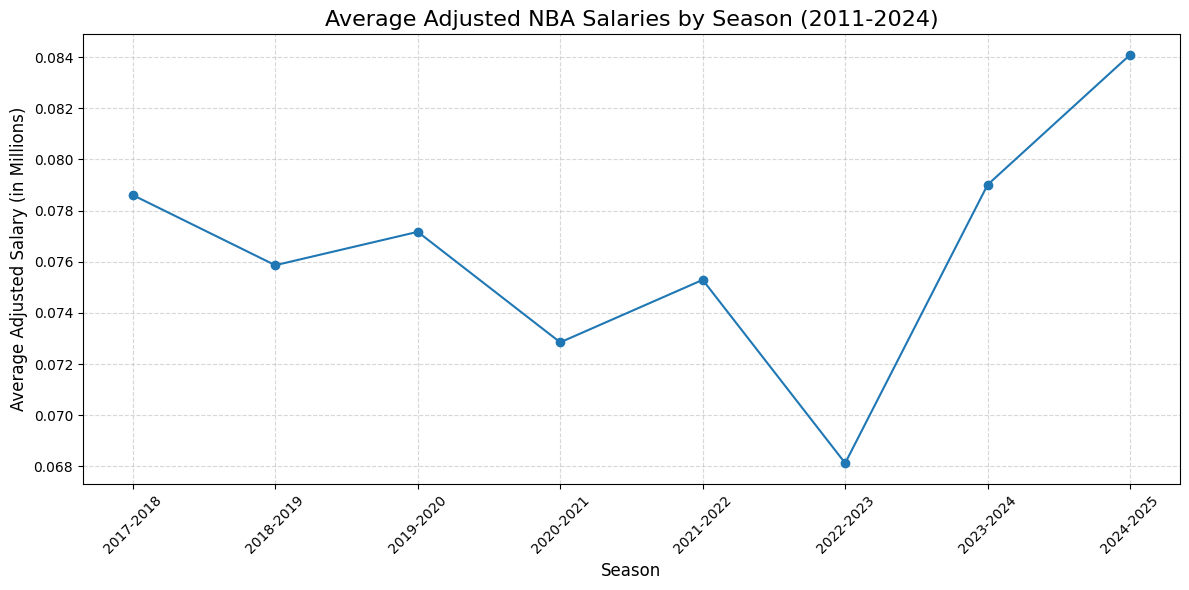

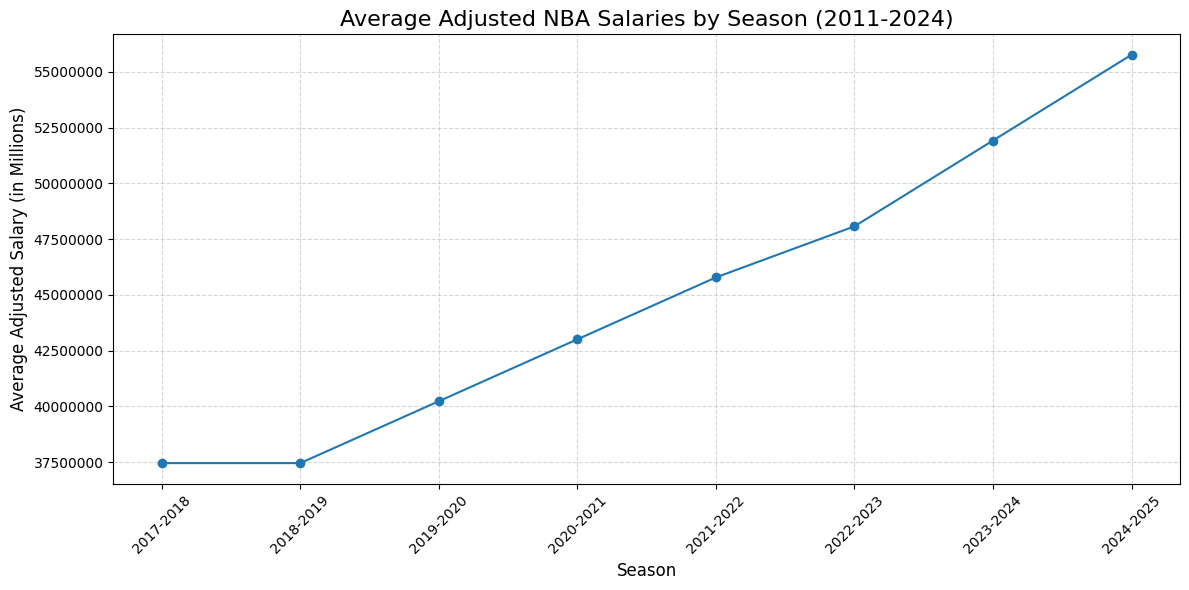

In [30]:

# 시즌별 평균 인플레이션 조정 연봉 계산
avg_salary_by_season = final_data.groupby('SEASON')['sc'].mean().reset_index()
a = final_data.groupby('SEASON')['sc'].min()
b = final_data.groupby('SEASON')['sc'].max()
c = final_data.groupby('SEASON')['sc'].mean()
print(a)
print(b)
print(c)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(avg_salary_by_season['SEASON'], avg_salary_by_season['sc'], marker='o')
plt.title('Average Adjusted NBA Salaries by Season (2011-2024)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Adjusted Salary (in Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # 지수 표현 제거

plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(avg_salary_by_season['SEASON'], ac['SALARY'], marker='o')
plt.title('Average Adjusted NBA Salaries by Season (2011-2024)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Adjusted Salary (in Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # 지수 표현 제거

plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()